<a href="https://colab.research.google.com/github/samuel10727/plot_plate_boundary_pygmt/blob/main/pygmt_plot_plate_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [1]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [2]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

In [3]:
!mamba install obspy --quiet

In [4]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.4.0
  pandas: 2.2.2
  xarray: 2025.12.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


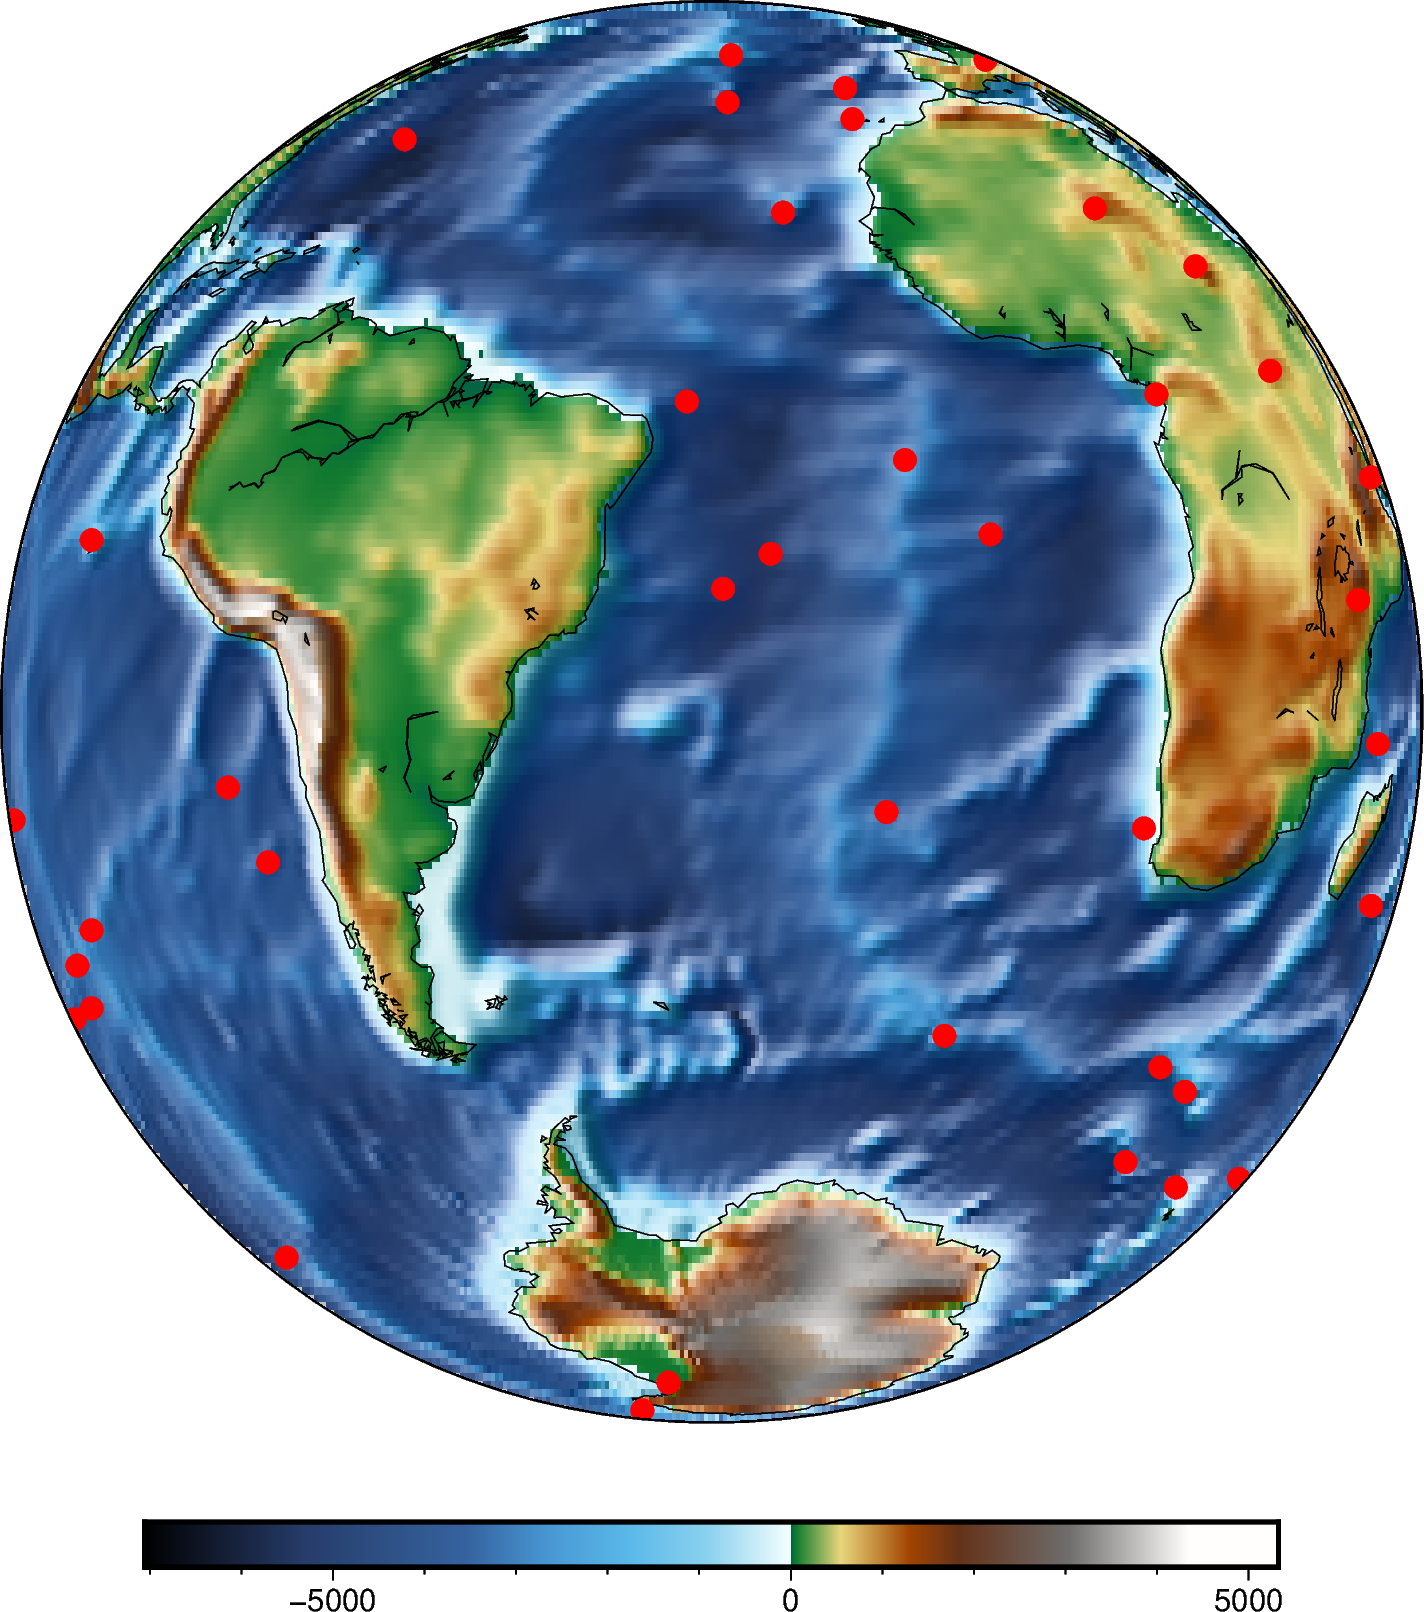

In [5]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

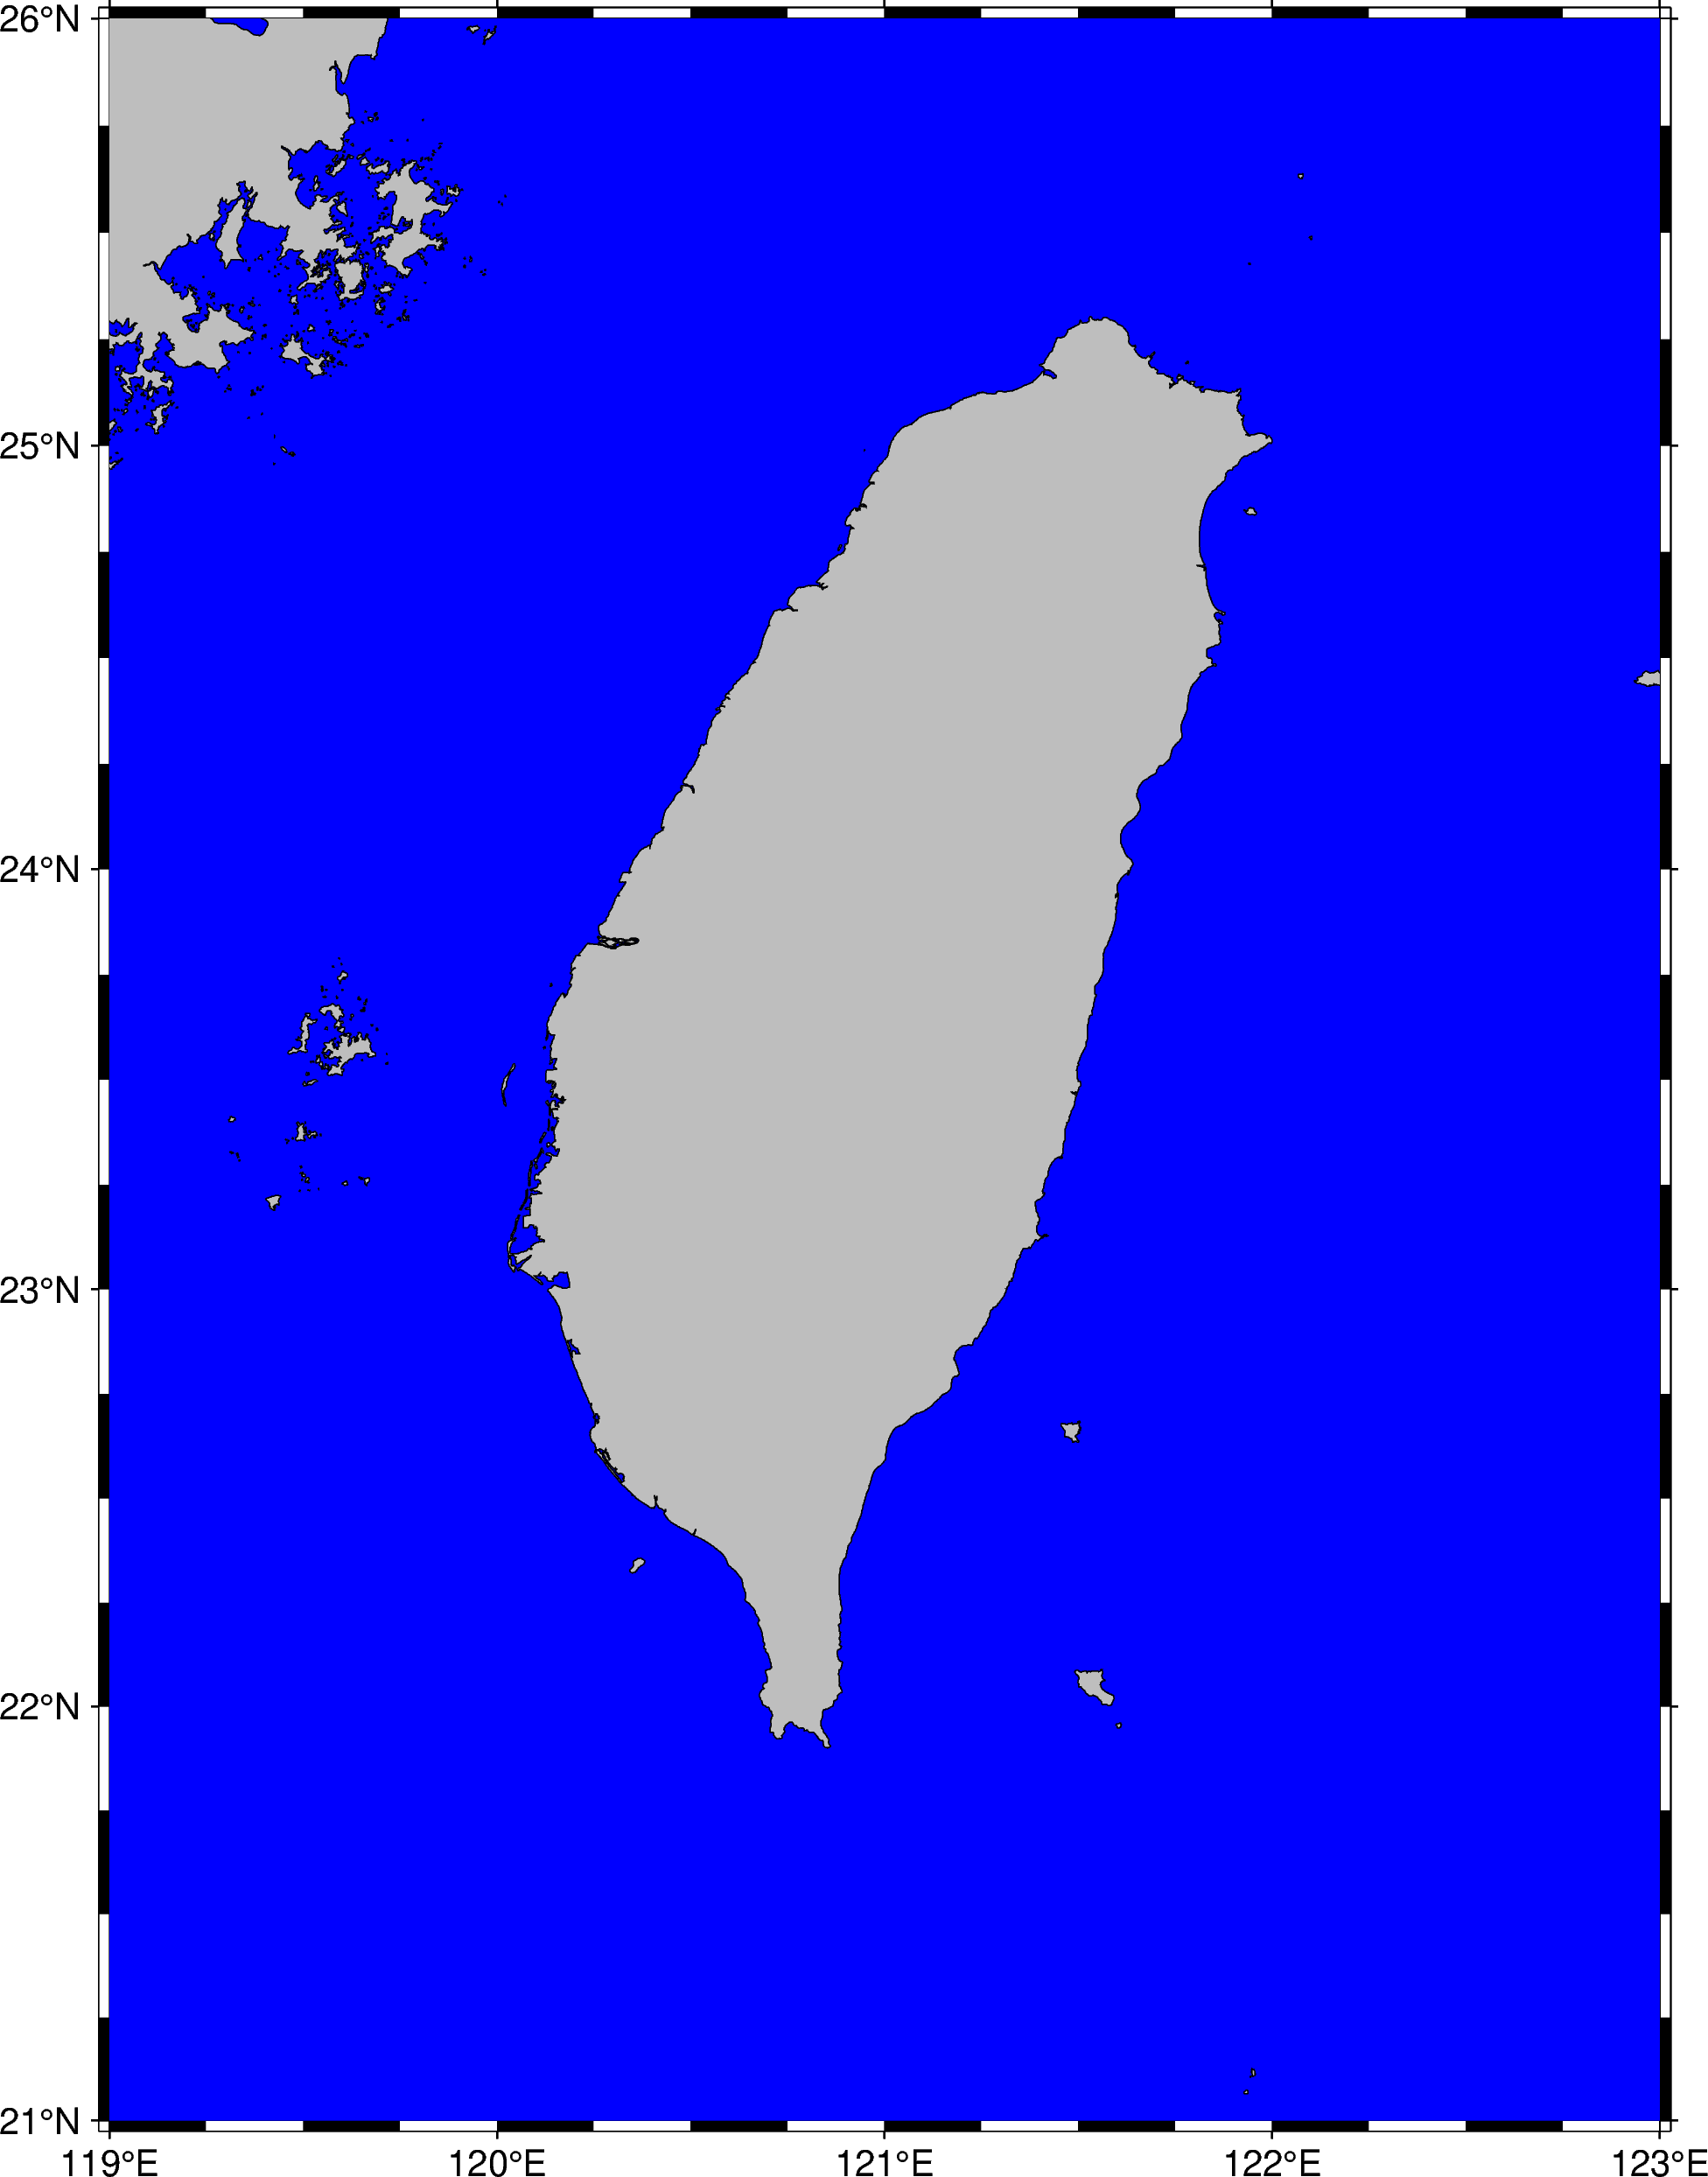

In [6]:
fig = pygmt.Figure()
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.coast(shorelines=True, land="gray", water="blue", resolution="full")
fig.show()

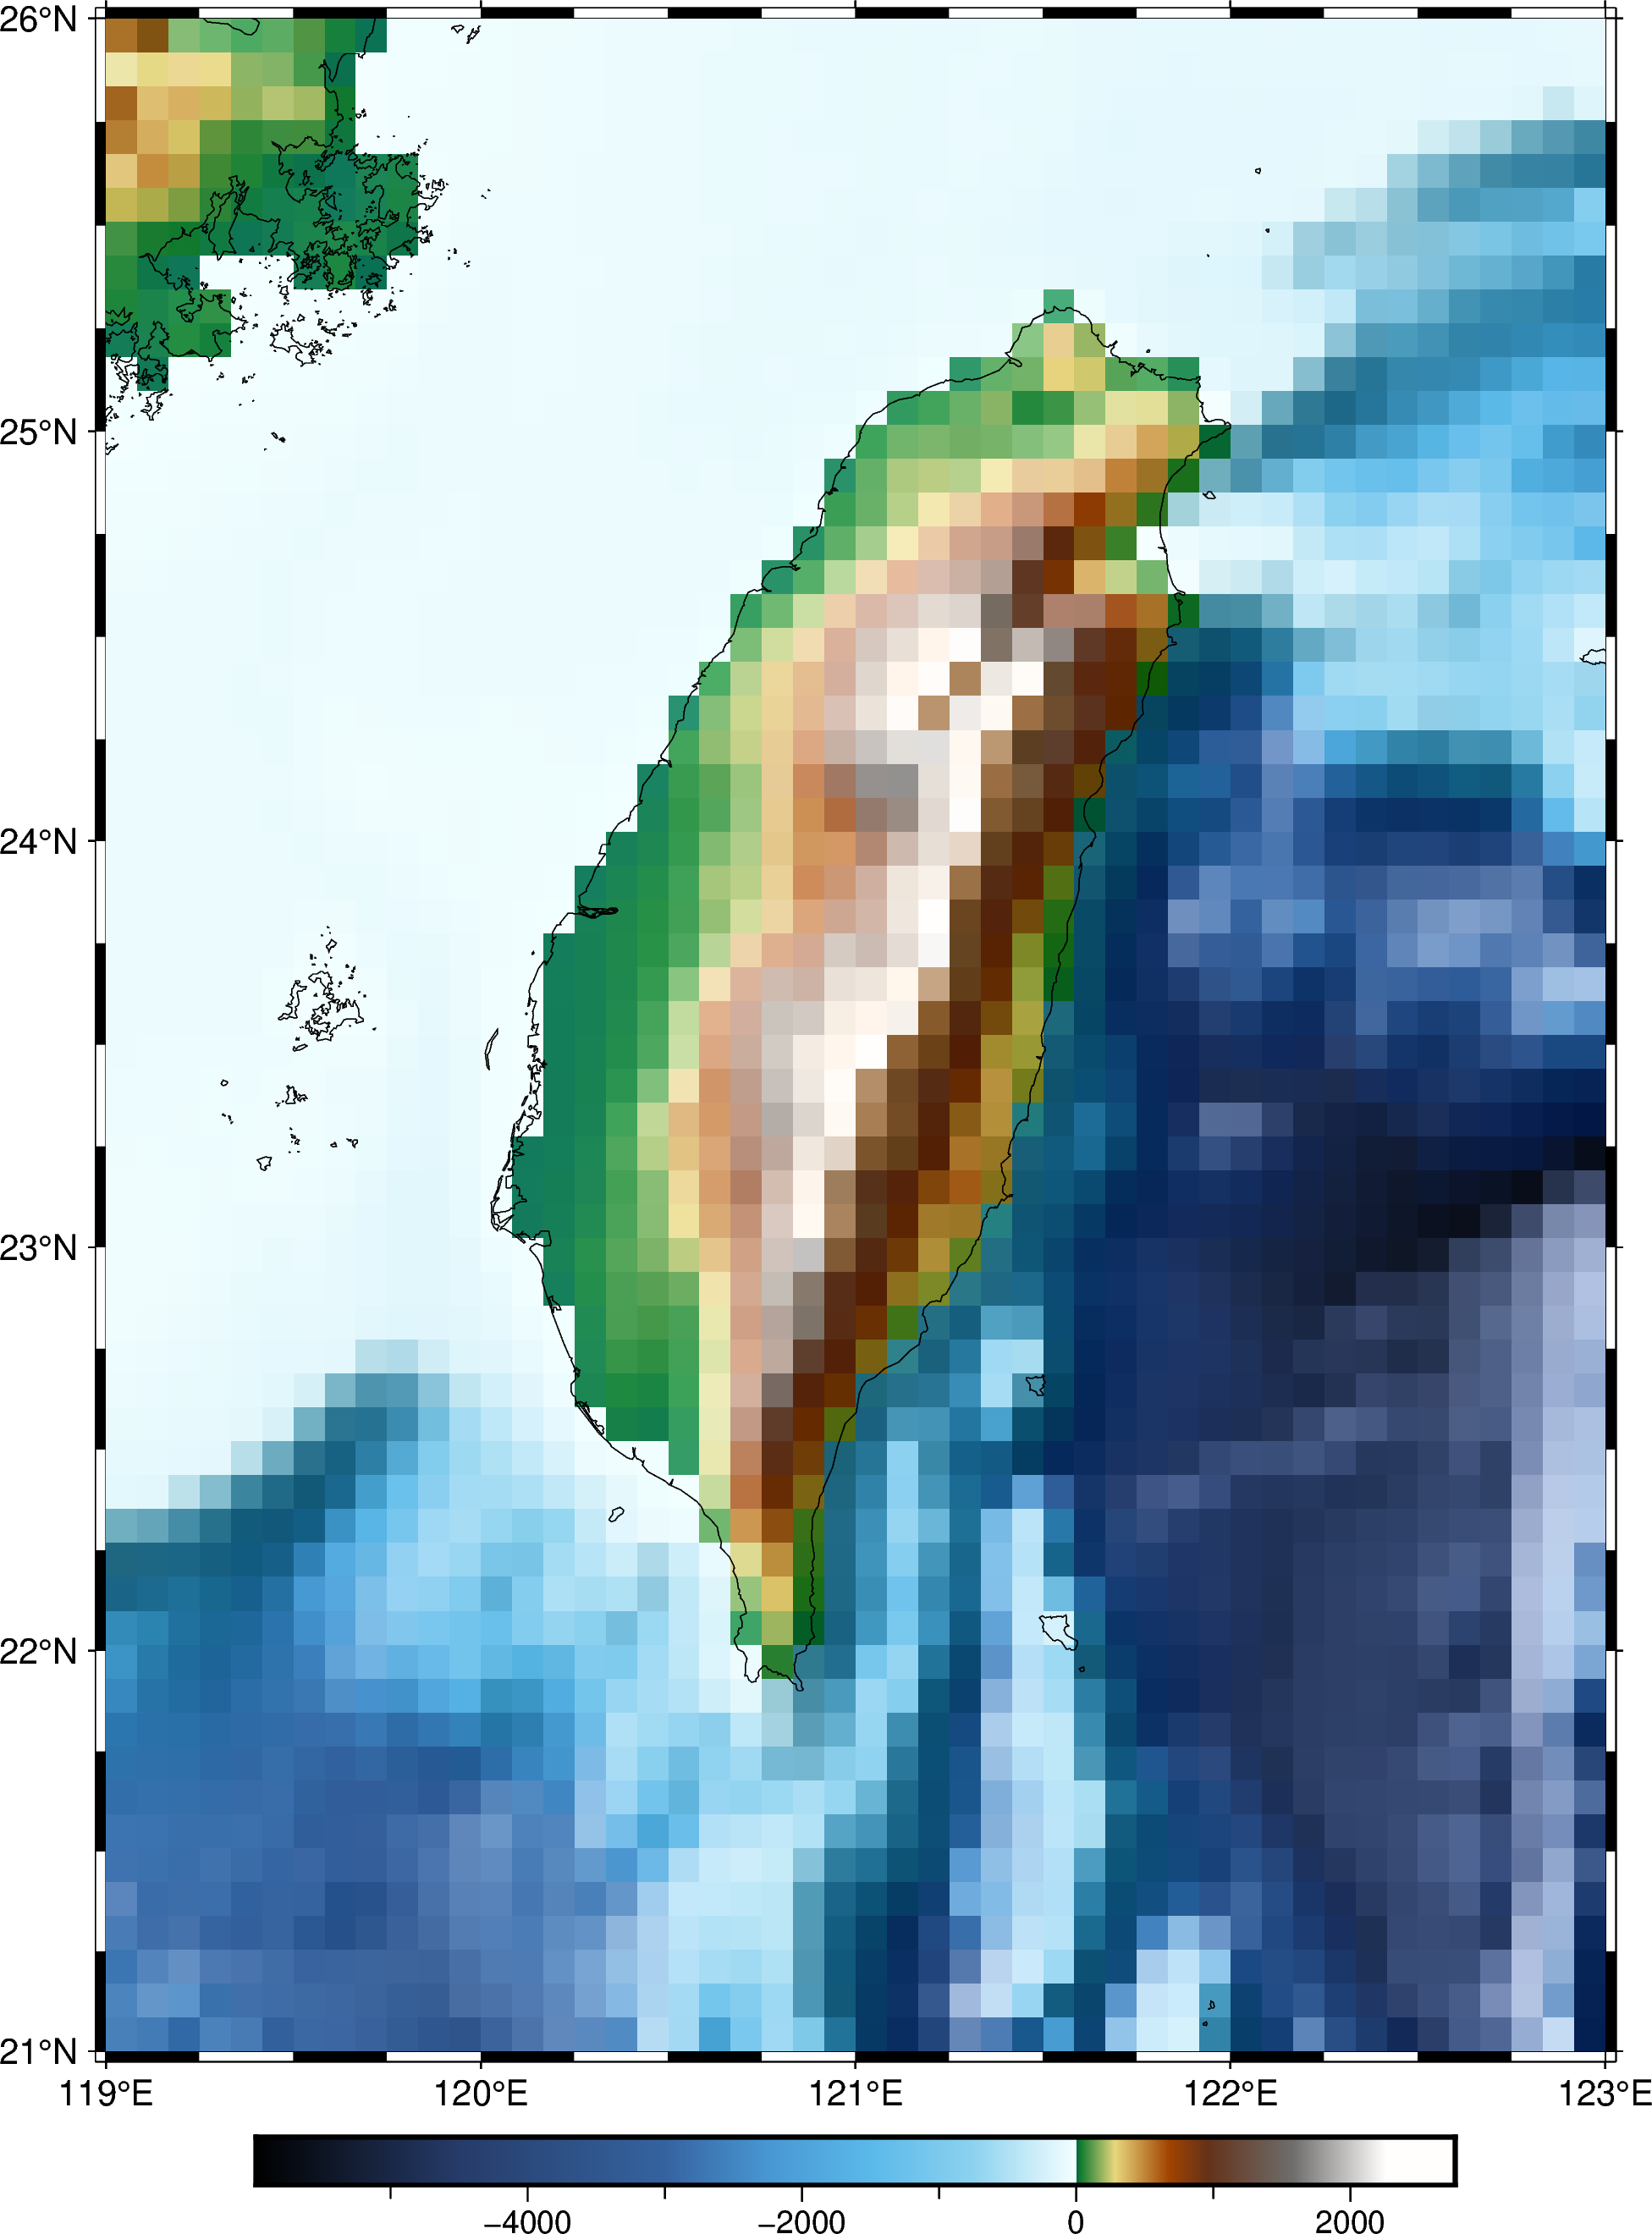

In [8]:
# Plot Taiwan with Earth relief data
from pygmt.datasets import load_earth_relief

# Load earth relief data for the region of Taiwan
# The 'region' parameter in basemap will effectively crop this global grid
grid = load_earth_relief(resolution='05m', region="119/123/21/26", registration='pixel')

fig = pygmt.Figure()
# Set region for Taiwan (longitude: 119-123, latitude: 21-26)
# Use Mercator projection ('M') for a regional view
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
# Use 'h' (high) resolution for better detail for Taiwan's coastlines
fig.coast(resolution='h', shorelines=True)
# Remove the global hotspots plot, as it's not specific to Taiwan in this context
# fig.plot(data='@hotspots.txt', style='c0.2c', fill='red') # Uncomment if you want to include global hotspots
fig.colorbar()
fig.show()

gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 10x10 arc minutes reduced by Gaussian Cartesian filtering (52.4 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [3.0M]: earth_relief_10m_g.grd


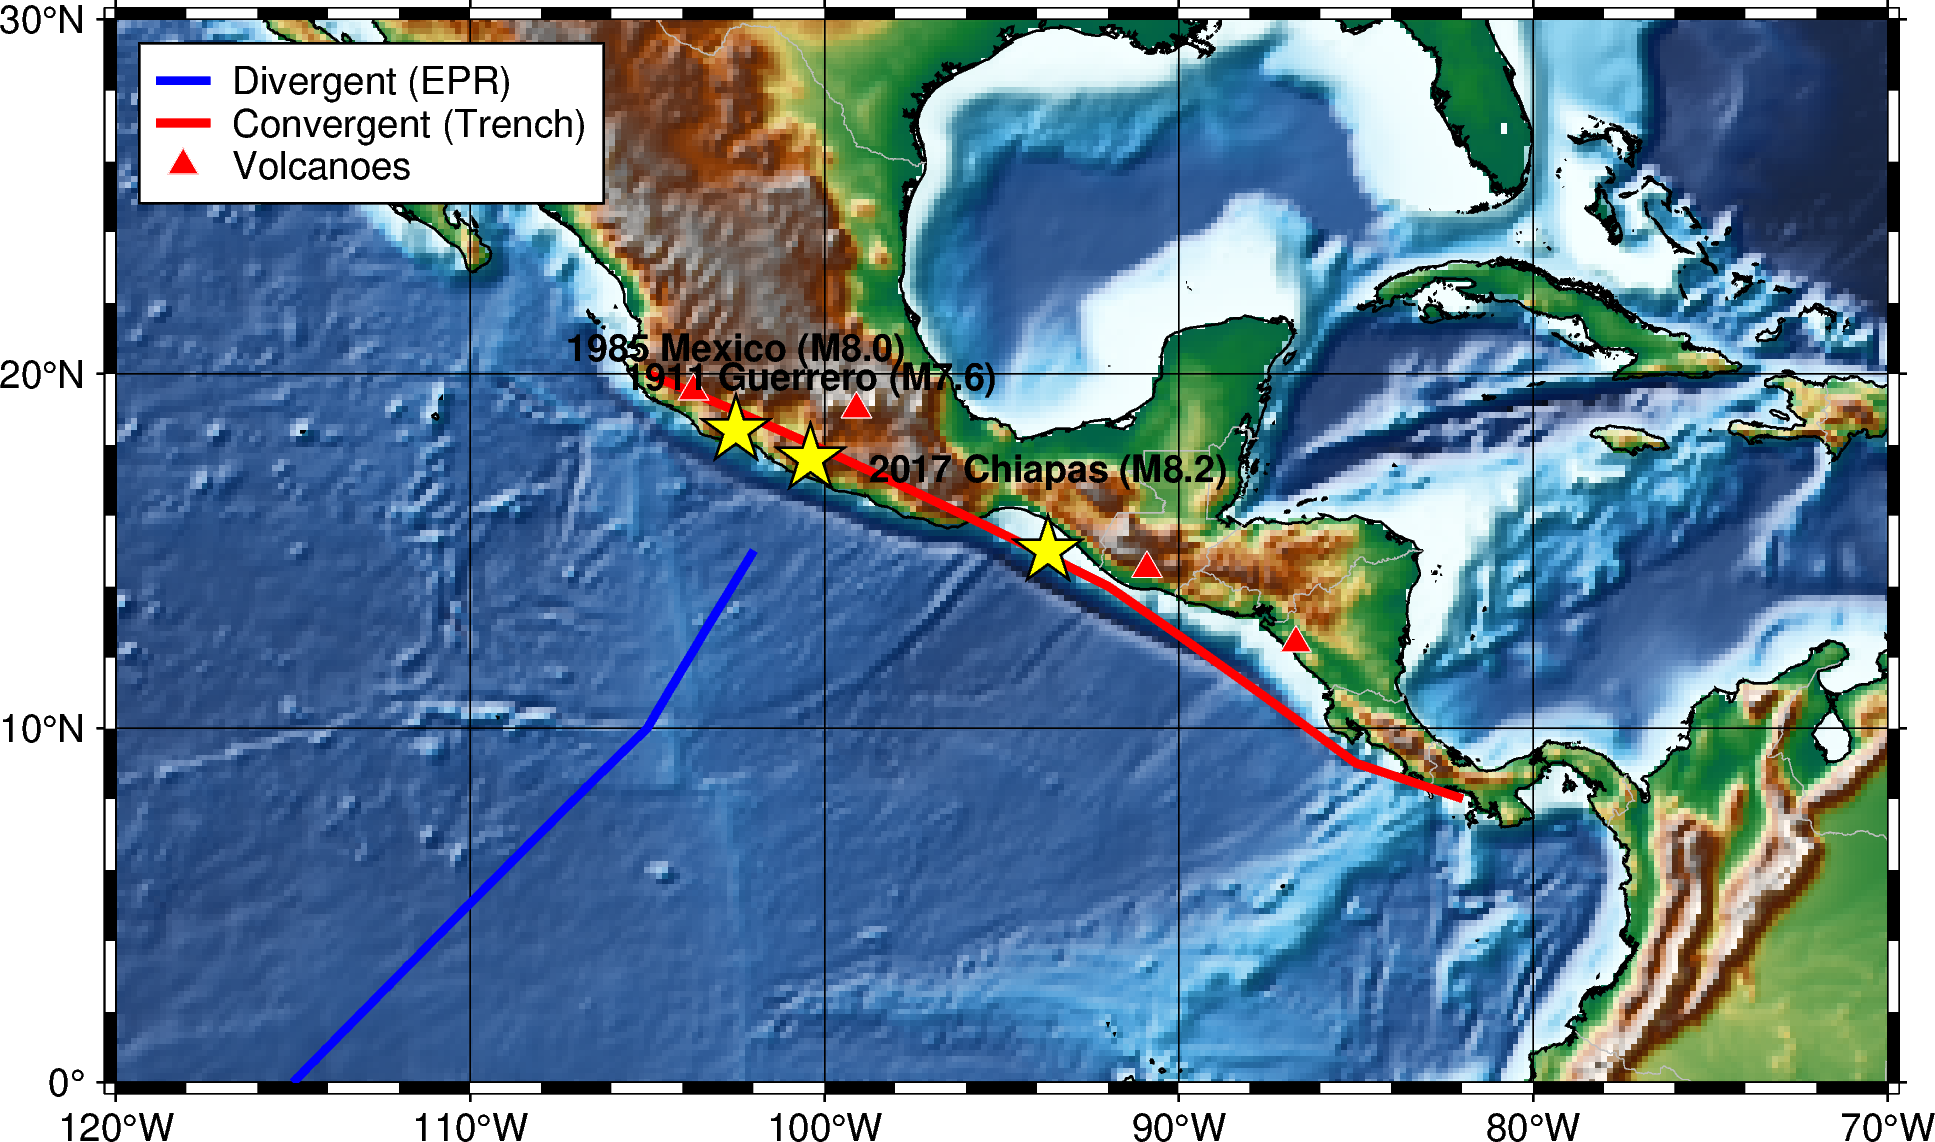

In [14]:
import pygmt
import pandas as pd

# 1. 設定區域：Cocos 板塊周邊 (西經 120-70, 北緯 0-30)
region = [-120, -70, 0, 30]

# 2. 定義著名歷史地震數據 (經度, 緯度, 規模, 標籤)
quakes = pd.DataFrame({
    "lon": [-102.5, -93.7, -100.4],
    "lat": [18.4, 15.0, 17.6],
    "text": ["1985 Mexico (M8.0)", "2017 Chiapas (M8.2)", "1911 Guerrero (M7.6)"]
})

# 3. 手動定義科科斯板塊大致邊界 (東太平洋海隆與海溝位置)
# 這是地球物理研究中常用的邊界簡化座標
ridge_lon, ridge_lat = [-115, -105, -102], [0, 10, 15] # 示意中洋脊
trench_lon, trench_lat = [-105, -95, -85, -80], [20, 15, 8, 7] # 示意海溝

fig = pygmt.Figure()

# 4. 繪製地形 (若連線失敗則僅繪製海岸線)
try:
    grid = pygmt.datasets.load_earth_relief(resolution="10m", region=region)
    fig.grdimage(grid=grid, cmap="geo", shading=True)
except:
    fig.coast(region=region, projection="M15c", land="lightgray", water="lightblue")

# 5. 繪製海岸線與國界 (這是內建資料，最穩定)
fig.coast(shorelines="1/0.5p,black", borders="1/0.2p,gray", frame="afg")

# 6. 繪製板塊邊界 (手動線段，藍色代表張裂，紅色代表俯衝)
fig.plot(x=[-115, -105, -102], y=[0, 10, 15], pen="2p,blue", label="Divergent (EPR)")
fig.plot(x=[-105, -92, -85, -82], y=[20, 14, 9, 8], pen="2p,red", label="Convergent (Trench)")

# 7. 繪製火山 (直接提供中、美洲幾個主要火山座標)
volcanoes = pd.DataFrame({
    "lon": [-103.7, -99.1, -90.9, -86.7],
    "lat": [19.5, 19.0, 14.5, 12.4]
})
fig.plot(x=volcanoes.lon, y=volcanoes.lat, style="t0.3c", fill="red", pen="0.1p,white", label="Volcanoes")

# 8. 標註著名歷史地震 (黃色星號)
fig.plot(x=quakes.lon, y=quakes.lat, style="a0.6c", fill="yellow", pen="0.5p,black")
fig.text(x=quakes.lon, y=quakes.lat, text=quakes.text, font="9p,Helvetica-Bold,black", offset="0c/0.7c")

# 9. 圖例
fig.legend(position="JTL+jTL+o0.2c", box="+gwhite+p0.5p")

fig.show()